In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import numpy.ma as ma
import matplotlib.colors as colors
import matplotlib.colors as colors
%matplotlib inline

In [ ]:
#clim = nc.Dataset('/ocean/jthibaul/research/data/hittite/E_climatology.nc')

In [ ]:
#E = clim.variables['E']

In [ ]:
#zdftmx = nc.Dataset('/ocean/jthibaul/research/data/hittite/zdftmx_check.nc')

In [ ]:
#H = zdftmx.variables['nav_lev'][:]

In [2]:
mesh = nc.Dataset('/mnt/storage0/xhu/ANHA4-I/mesh_mask_anha4_201509.nc')

In [3]:
mask = mesh.variables['tmask'][0]

In [4]:
e1t= mesh.variables['e1t'][0,:,:]  # dx
e2t= mesh.variables['e2t'][0,:,:]  # dy 
e3t= mesh.variables['e3t'][0,:,:,:]
dep = mesh.variables['gdept_0'][0,:]

In [5]:
volume=e1t*e2t*e3t

In [12]:
date = 'y2011m01d05'

In [13]:
grid = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_y2011m01d05_gridW.nc')

In [14]:
grid2 = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_y2011m01d05_gridW.nc')

In [15]:
grid3 = nc.Dataset('/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_y2011m01d05_gridW.nc')

In [10]:
tracer = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_y2011m01d05_gridT.nc')
tracer2 = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_y2011m01d05_gridT.nc')
tracer3 = nc.Dataset('/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_y2011m01d05_gridT.nc')

In [16]:
lat = grid.variables['nav_lat']
lon = grid.variables['nav_lon']
H = grid.variables['depthw']

In [11]:
sal=tracer.variables['vosaline'][0,:,:,:]
temp = tracer.variables['votemper'][0,:,:,:]
sal2=tracer2.variables['vosaline'][0,:,:,:]
temp2 = tracer2.variables['votemper'][0,:,:,:]
sal3=tracer3.variables['vosaline'][0,:,:,:]
temp3 = tracer3.variables['votemper'][0,:,:,:]

In [17]:
import gsw

In [18]:
kappa = grid.variables['votkeavt'][0,:,:,:]
kappa2 = grid2.variables['votkeavt'][0,:,:,:]
kappa3 = grid3.variables['votkeavt'][0,:,:,:]

In [19]:
ktidalslj = grid.variables['votkeavtidal']
ktidalp = grid2.variables['votkeavtidal']

In [18]:
ngrid = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'+date+'_nsquare.nc')
ngrid2 = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'+date+'_nsquare.nc')
ngrid3 = nc.Dataset('/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'+date+'_nsquare.nc')
nsq = ngrid.variables['nsquare']
nsq2 = ngrid2.variables['nsquare']
nsq3 = ngrid3.variables['nsquare']

In [7]:
# count910 = 0
# count9102 = 0
# for i in np.arange(0,len(kappa[0,:,0])):
#     for j in np.arange(0,len(kappa[0,0,:])):
#         for k in np.arange(0,len(kappa[:,0,0])):
#             if kappa[k,i,j] > 0.01:
#                 count910 = count910 +1
#                 kappa[k,i,j] = np.nan
#             if kappa[k,i,j] > 0.009:
#                 count9102 = count9102 +1

In [8]:
# count510 = 0
# count5102 = 0
# for i in np.arange(0,len(kappa2[0,:,0])):
#     for j in np.arange(0,len(kappa2[0,0,:])):
#         for k in np.arange(0,len(kappa2[:,0,0])):
#             if kappa2[k,i,j] > 0.01:
#                 count510 = count510 +1
#                 kappa2[k,i,j] = np.nan
#             if kappa2[k,i,j] > 0.009:
#                 count5102 = count5102 +1

In [9]:
# count310 = 0
# count3102 = 0
# for i in np.arange(0,len(kappa3[0,:,0])):
#     for j in np.arange(0,len(kappa3[0,0,:])):
#         for k in np.arange(0,len(kappa3[:,0,0])):
#             if kappa3[k,i,j] > 0.01:
#                 count310 = count310 +1
#                 kappa3[k,i,j] = np.nan
#             if kappa3[k,i,j] > 0.009:
#                 count3102 = count3102 +1

In [ ]:
count910

In [15]:
p = np.zeros_like(sal,dtype=np.dtype('f8'))
#p2 = np.zeros_like(sal2,dtype=np.dtype('f8'))

for dep in np.arange(0,len(H)):
    print(dep)
    for j in np.arange(0,len(sal[0,:])):
         p[dep,j,:] = gsw.p_from_z(H[dep],lat[j,250])
    #p2[dep,j,:] = gsw.p_from_z(H[dep],lat[j,250])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
# nsquare = np.zeros_like(p,dtype=np.dtype('f8'))
# nsquare2 = np.zeros_like(p,dtype=np.dtype('f8'))
# nsquare3 = np.zeros_like(p,dtype=np.dtype('f8'))
# # for dep in z:
# #     print(dep)
# for i in np.arange(0,len(sal[0,:,0])):
#     print(i)
#     for j in np.arange(0,len(sal[0,0,:])):
        
#         nsquare[1:,i,j],p_mid = gsw.Nsquared(sal[:,i,j],temp[:,i,j],p[:,i,j],lat[j,250])
#         nsquare2[1:,i,j],p_mid = gsw.Nsquared(sal2[:,i,j],temp2[:,i,j],p[:,i,j],lat[j,250]) 
#         nsquare3[1:,i,j],p_mid = gsw.Nsquared(sal3[:,i,j],temp3[:,i,j],p[:,i,j],lat[j,250]) 

0


In [ ]:
# nsquare.dump('n2VJT002_110105.npy')
# nsquare2.dump('n2VJT003_110105.npy')
# nsquare3.dump('n2EXH005_110105.npy')


In [78]:
# nsquare = np.load('n2VJT002_110105.npy')
# nsquare2 = np.load('n2VJT003_110105.npy')
# nsquare3 = np.load('n2EXH005_110105.npy')

In [7]:
grid = nc.Dataset("/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_y2008m01d05_nsquare.nc")

In [12]:
nsquare = grid.variables['nsquare']

In [13]:
nsquare2= nsquare
nsquare3 = nsquare

In [ ]:
kappa1D = kappa.ravel()
kappa1D2 = kappa2.ravel()
kappa1D3 = kappa3.ravel()
nsq1D = nsquare.ravel()
nsq1D2 = nsquare2.ravel()
nsq1D3 = nsquare3.ravel()

In [ ]:
kappa1D = np.ma.masked_invalid(kappa1D)
kappa1D2 = np.ma.masked_invalid(kappa1D2)
kappa1D3 = np.ma.masked_invalid(kappa1D3)

In [ ]:
k_corr = np.ma.corrcoef(nsq1D,nsq1D2)

In [ ]:
k_corr[0,1]

In [ ]:
colour = nsq1D[0:-1:1]
minimum_log_level = 10**(-10)
maximum_scale_level = colour.max()
norm = colors.SymLogNorm(vmin=-maximum_scale_level,
                                 vmax=maximum_scale_level,linthresh=minimum_log_level,linscale=0)

plt.scatter(kappa1D2[0:-1:1],kappa1D3[0:-1:1], marker='+', c=colour, s=150, cmap=plt.cm.bwr,norm=norm)

ticks=[10**(-2),10**(-4),10**(-6),10**(-8),10**(-10),-10**(-8),-10**(-6),-10**(-4),-10**(-2)]
labels = ['10^-2','10^-4','10^-6','10^-8)','+/-10^-10','-10^-8','-10^-6','-10^-4','-10^-2']

bar = plt.colorbar( orientation='vertical', extend='both',label='N2')
bar.set_ticks(ticks,labels)
ticks[4] = r'$\pm${:g}'.format(minimum_log_level)
bar.set_ticklabels(labels)

plt.yscale('log')
plt.xscale('log')

plt.axis((10**(-6),10**(-2) , 10**(-6), 10**(-2)))
plt.xlabel('K Polzin')
plt.ylabel('K control Run')
#plt.title('Correlation = {d:.3f}'.format(d=k_corr[0,1]))
#plt.scatter(kappa1D[0:-1:10000],kappa1D2[0:-1:10000])
plt.show()

In [ ]:
n2_corr = np.corrcoef(nsq1D,nsq1D2)

In [ ]:
plt.scatter(nsq1D,nsq1D2)
plt.xlabel('N2 EXH009')
plt.ylabel('N2 EXH005')
plt.title('Correlation = {d:.3f}'.format(d=n2_corr[0,1]))
plt.show()

In [ ]:
h2grid = nc.Dataset('/ocean/jthibaul/data/hsquare.nc')

In [ ]:
hsquare = h2grid.variables['hsquare']

In [ ]:
for i in np.arange(0,len(hsquare[:,0])):
    for j in np.arange(0,len(hsquare[0,:])):
        if hsquare[i,j] == -1.0:
            hsquare[i,j] = 10**(-5)

In [ ]:
#h2 = np.repeat(hsquare[np.newaxis,:,:], 50, axis=0)

H2 = np.ones_like(nsquare)

for k in np.arange(0,len(nsquare[:,0,0])):
    H2[k,:,:] = hsquare[:,:]



In [ ]:
h21D = np.ravel(H2)

In [ ]:
np.corrcoef(nsq1D,nsq1D2)

In [ ]:
colour = h21D[0:-1:1]
minimum_log_level = 10**(-5)
maximum_scale_level = colour.max()
norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)

plt.scatter(kappa1D2[0:-1:1],kappa1D3[0:-1:1], marker='+', c=colour, s=150, cmap=plt.cm.jet,norm=norm)
bar = plt.colorbar( orientation='vertical', extend='both',label='h2')

#plt.scatter(kappa1D[0:-1:10000],kappa1D2[0:-1:10000])


# ticks=[10**(-2),10**(-4),10**(-6),10**(-8),10**(-10),-10**(-8),-10**(-6),-10**(-4),-10**(-2)]
# labels = ['10^-2','10^-4','10^-6','10^-8)','+/-10^-10','-10^-8','-10^-6','-10^-4','-10^-2']

# bar = plt.colorbar( orientation='vertical', extend='both',label='N2')
# bar.set_ticks(ticks,labels)
# ticks[4] = r'$\pm${:g}'.format(minimum_log_level)
# bar.set_ticklabels(labels)

plt.yscale('log')
plt.xscale('log')

plt.axis((10**(-6),10**(-2) , 10**(-6), 10**(-2)))
plt.xlabel('K Polzin')
plt.ylabel('K control Run')

#plt.scatter(kappa1D[0:-1:10000],kappa1D2[0:-1:10000])
plt.show()

In [ ]:

E2 = np.ones_like(nsquare)

for k in np.arange(0,len(nsquare[:,0,0])):
    E2[k,:,:] = E[:,:]



In [ ]:
E1D = np.ravel(E2)

In [ ]:
E1D.min()

In [ ]:
colour = E1D[0:-1:1]
minimum_log_level = 10**(-5)
maximum_scale_level = 10**-2
norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)

plt.scatter(kappa1D[0:-1:1],kappa1D3[0:-1:1], marker='+', c=colour, s=150, cmap=plt.cm.jet,norm=norm)
bar = plt.colorbar( orientation='vertical', extend='both',label='E(x,y)')

plt.yscale('log')
plt.xscale('log')

plt.axis((10**(-6),10**(-2) , 10**(-6), 10**(-2)))
plt.xlabel('K St Laurent and Jayne')
plt.ylabel('K control Run')

#plt.scatter(kappa1D[0:-1:10000],kappa1D2[0:-1:10000])
plt.show()

Now Compute global average of kappa by depth

In [20]:
kappa = np.ma.masked_invalid(kappa)
kappa2 = np.ma.masked_invalid(kappa2)
kappa3 = np.ma.masked_invalid(kappa3)

In [20]:
nsquare = ma.array(nsq,mask=(mask-1)*1)
nsquare2 = ma.array(nsq2,mask=(mask-1)*1)
nsquare3 = ma.array(nsq3,mask=(mask-1)*1)

In [21]:
ktidalslj = np.ma.masked_invalid(ktidalslj[0])
ktidalp = np.ma.masked_invalid(ktidalp[0])

In [22]:
def interpolate_to_T(var):
    '''
    interpolate variable on w grid to T grid
    '''
    var_new = np.zeros_like(var)
    var_new[-1.:,:] = var[-1,:,:]
    #now interpolate
    var_new[0:-1,:,:] = (var[0:-1,:,:]+var[1:,:,:])/2
    
    return var_new


In [23]:
#interpolate onto t-grid to use volume weighting
ckappa = interpolate_to_T(kappa3)
pkappa = interpolate_to_T(kappa2)
sjkappa = interpolate_to_T(kappa)

In [24]:
ktidalslj = interpolate_to_T(ktidalslj)
ktidalp = interpolate_to_T(ktidalp)

In [25]:
#nsquare already on T-grid
cnsquare = nsquare3
pnsquare = nsquare2
sjnsquare = nsquare

In [26]:
def log_mean(var,kappa=False):

    var_new = np.zeros((50))

    for k in np.arange(0,len(var[:,0,0])):
        print(k)
        counter = 0.0
        tot = 0.0

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if kappa == True:
                    if ma.is_masked(var[k,i,j]) == False and var[k,i,j]<=10**-2:
                            counter = counter+volume[k,i,j]
                            tot = tot + np.log(var[k,i,j])*volume[k,i,j]
                else:
                    if ma.is_masked(var[k,i,j]) == False:
                            counter = counter+volume[k,i,j]
                            tot = tot + np.log(var[k,i,j])*volume[k,i,j]

        if counter!= 0:
            var_new[k] = np.exp(tot/counter)
            
    return var_new

def arith_mean(var, kappa=False):
    var_new = np.zeros((50))

    for k in np.arange(0,len(var[:,0,0])):
        print(k)
        counter = 0.0
        tot = 0.0

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if kappa == True:
                    if ma.is_masked(var[k,i,j]) == False and var[k,i,j]<=10**-2:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]
                else:
                    if ma.is_masked(var[k,i,j]) == False:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]

        if counter!= 0:
            var_new[k] = tot/counter
            
    return var_new

In [64]:
#function for remake array to be distance from bottom
#find bottom most cell for each vertical profile and set to 0
#for each subsequent cell calculate distance using zlevels 
#based on depth of individual profile - each will have different resolution so a 3D grid of distance from
#bottom will also be needed
def depth_from_bottom(var):
    dfb_var = np.zeros_like(var)
    dfb = np.zeros_like(var)

    for ii in np.arange(0,len(var[0,:,0])):
        for jj in np.arange(0,len(var[0,0,:])):
            dfbcount = 0
            for kk in np.arange(49,-1,-1):
                if ma.is_masked(var[kk,ii,jj]):
                    continue
                else:
                    dfb_var[dfbcount,ii,jj] = var[kk,ii,jj]
                    if dfbcount == 0:
                        dfb[kk,ii,jj] = 0.0
                        bottom = H[kk]
                    else: 
                        dfb[dfbcount,ii,jj] = bottom-H[kk]
                    dfbcount = dfbcount+1
    
    print('completed')
    return dfb_var, dfb
                
                

In [68]:
dfb_kappa, dfbk = depth_from_bottom(kappa)
dfb_kappa2, dfbk = depth_from_bottom(kappa2)
dfb_kappa3, dfbk = depth_from_bottom(kappa3)


completed
completed
completed


In [66]:
print(dfb_kappa[:,100,250])
print(kappa[:,100,250])
print(dfbk[:,100,250])

[0.006020124536007643 0.005940636619925499 0.0032764049246907234
 0.0011611439986154437 0.00043598285992629826 0.000167331745615229
 8.371898729819804e-05 4.170695319771767e-05 2.5223127522622235e-05
 1.852075911301654e-05 1.479693401051918e-05 1.0468525942997076e-05
 6.453825335483998e-06 4.971159341948805e-06 5.154007340024691e-06
 5.058786882727873e-06 4.250880465406226e-06 4.1486905502097216e-06
 3.918137281289091e-06 3.83098449674435e-06 2.2446711227530614e-06
 1.0516562269913265e-06 1.0255151892124559e-06 1.020583908939443e-06
 1.02383341982204e-06 1.123284505410993e-06 2.5754992961883545
 5.026871681213379 3.1524603366851807 3.678300142288208 2.6286275386810303
 2.827584981918335 3.4020729064941406 4.101637840270996 4.551519393920898
 5.0512824058532715 5.301260471343994 5.5262603759765625 5.801287651062012
 6.151244163513184 6.276212215423584 6.4761176109313965 6.7010579109191895
 7.126140594482422 0.001078062690794468 -- -- -- -- --]
[0.001078062690794468 7.126140594482422 6.7

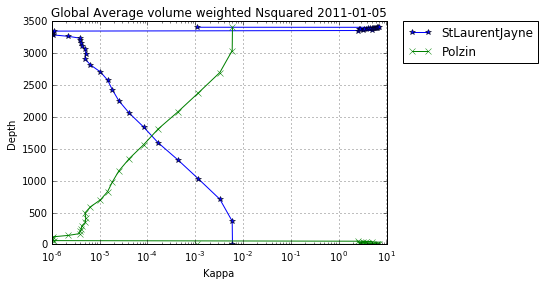

In [67]:
plt.plot(dfb_kappa[:,100,250],dfbk[:,100,250],marker='*')
plt.plot(kappa[:,100,250],H[:],marker='x')
# plt.plot(dfb_kappa2[:,100,250],dfbk[:,100,250],marker='*')
# plt.plot(dfb_kappa3[:,100,250],dfbk[:,100,250],marker='*')

plt.title('Global Average volume weighted Nsquared 2011-01-05')
plt.legend([ 'StLaurentJayne', 'Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
plt.xlabel('Kappa')
plt.ylabel('Depth')
plt.grid()
#plt.xlim([10**-5,10**-4])
#plt.ylim(H[-1],H[0])

In [27]:
cnsq_glob = arith_mean(cnsquare)
pnsq_glob = arith_mean(pnsquare)
sjnsq_glob = arith_mean(sjnsquare)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [20]:
ckap_glob = log_mean(ckappa,kappa=True)
pkap_glob = log_mean(pkappa,kappa=True)
sljkap_glob = log_mean(sjkappa,kappa=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [12]:
pkaptidal_glob = log_mean(ktidalp)
sljkaptidal_glob = log_mean(ktidalslj)

(5500.0015, 0.0)

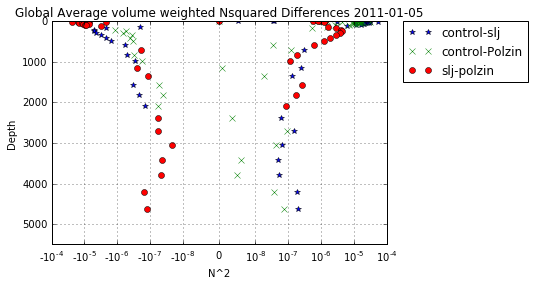

In [31]:
plt.plot(cnsq_glob[:-2]-sjnsq_glob[:-2],H[:-2],marker='*',linestyle='')
plt.plot(cnsq_glob[:-2]-pnsq_glob[:-2],H[:-2],marker='x',linestyle='')
plt.plot(sjnsq_glob[:-2]-pnsq_glob[:-2],H[:-2],marker='o',linestyle='')
# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
plt.title('Global Average volume weighted Nsquared Differences 2011-01-05')
plt.legend([ 'control-slj', 'control-Polzin','slj-polzin'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ticks = [-10**-2, -10**-3, -10**-4, -10**-5,10**-6, 10**-5, 10**-4, 10**-3, 10**-2] 
plt.xscale('symlog',linthreshx=10**-8)
#plt.xscale('log')
ticks = ['-10e-2', '-10e-3', '-10e-4', '-10e-5',
         '+/-10e-6', '10e-5', '10e-4', '10e-3', '10e-2'] 
plt.xlabel('N^2')
plt.ylabel('Depth')
plt.grid()
#plt.xlim([-10**-4,10**-4])
plt.ylim(H[-1],H[0])

(5500.0015, 0.0)

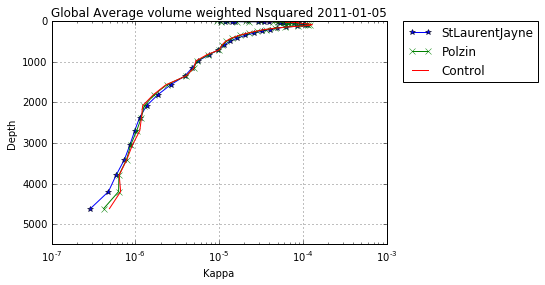

In [32]:
plt.plot(sjnsq_glob[:-2],H[:-2],marker='*')
plt.plot(pnsq_glob[:-2],H[:-2],marker='x')
plt.plot(cnsq_glob[:-2],H[:-2])
# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
plt.title('Global Average volume weighted Nsquared 2011-01-05')
plt.legend([ 'StLaurentJayne', 'Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
plt.xlabel('Kappa')
plt.ylabel('Depth')
plt.grid()
#plt.xlim([10**-5,10**-4])
plt.ylim(H[-1],H[0])

(5500.0015, 0.0)

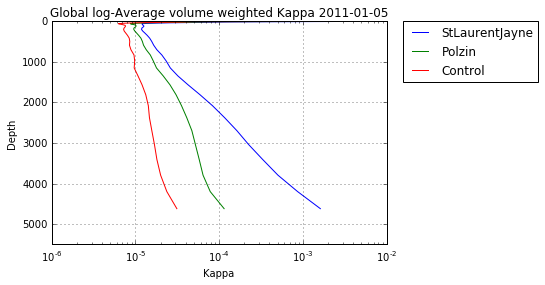

In [36]:

plt.plot(sljkap_glob[:-2],H[:-2])
plt.plot(pkap_glob[:-2],H[:-2])
plt.plot(ckap_glob[:-2],H[:-2])
# plt.plot(kaptidal_glob,H)
# plt.plot(kap2tidal_glob,H)
plt.title('Global log-Average volume weighted Kappa 2011-01-05')
plt.legend([ 'StLaurentJayne', 'Polzin','Control'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
plt.xlabel('Kappa')
plt.ylabel('Depth')
plt.grid()
#plt.xlim([10**-5,10**-4])
plt.ylim(H[-1],H[0])

In [ ]:
plt.plot(kap_glob)
plt.plot(kap2_glob)                                                                                                                               
plt.title('Global Average Kappa')
plt.legend(['kappa EXH009', 'Kappa EXH005'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xscale('log')
#ax.set_title('Turbulent Dissipation Rate',depth[40])
plt.xlabel('Kappa')
plt.ylabel('Depth')
# plt.ylim(H[-1],H[0])

In [ ]:
E = np.ma.masked_where(E[:,:] ==0,E)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
minimum_log_level = 10**(-5)
maximum_scale_level = 10**(-2)
norm = colors.LogNorm(vmin=minimum_log_level,
                                 vmax=maximum_scale_level)
#clines = ax.contour(E,0.0,colors='white')
mesh = ax.pcolormesh(E,norm=norm,cmap=cmap)

cbar = fig.colorbar(mesh)
                    #ticks=[10e-5,10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3],ax=ax,format='%.1e')
cbar.set_label('E(x,y)')
plt.tick_params(
    axis='',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.axis((0, E.shape[1], 0, E.shape[0]))
plt.axis('off')
#clines = ax.contour(E,0.0,colors='white')
ax.grid()



In [ ]:
#H, xedges, yedges = np.histogram2d(kappa1D2, kappa1D, bins=5)
#np.logspace(10**(-6), 10**(-2), 5)
kappa1DB = kappa1D*(10**6)
kappa1D2B = kappa1D2*(10**6)

In [ ]:
m_arr_mask = ((~(ma.getmaskarray(kappa1D)))*1 + (~(ma.getmaskarray(kappa1D)))*1)//2
print(mask[100000:100110])

In [ ]:
xedges = np.logspace(-5, 1, 10)
yedges = np.logspace(-5, 1, 10)

In [ ]:
Histo = np.histogram2d(kappa1D2[m_arr_mask], kappa1D[m_arr_mask],
                                       bins= (xedges,yedges))

In [ ]:
Histo

In [ ]:
H

In [ ]:
Xedges = [0.0, 0.000001, 0.0001, 0.001, 0.01]
Yedges = [0.0, 0.000001, 0.0001, 0.001, 0.01]
# x = np.random.normal(0,1, 1000)
# y = np.random.normal(0,1, 1000)
x = kappa1D
y = kappa1D2
H, xedges, yedges = np.histogram2d(y, x, bins=(Xedges, Yedges))

In [ ]:
H

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(132)
# ax.set_title('pcolormesh: exact bin edges')
# xedges = [10**(-6),10**(-5), 10**(-4),10**(-3),10**(-2)]
# yedges = [10**(-6),10**(-5), 10**(-4),10**(-3),10**(-2)]
X, Y = np.meshgrid(Xedges, Yedges)
norm = colors.LogNorm(vmin=10**2,
                                 vmax=10**7)

mesh = ax.pcolormesh(X,Y,H,norm=norm,cmap='jet')
cbar = fig.colorbar(mesh)
#ax.axis((10**(-6),10**(-2) , 10**(-6), 10**(-2)))
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_aspect('equal')

In [ ]:
xedges = [0.0, 0.000001, 0.00001, 0.0001, 0.001,0.01]
yedges = [0.0, 0.000001, 0.00001, 0.0001, 0.001,0.01]
# x = np.random.normal(0,1, 1000)
# y = np.random.normal(0,1, 1000)
x = kappa1D
y = kappa1D2

plt.hist2d(y, x, bins=(xedges, yedges))
plt.colorbar()
plt.gca().set_xscale("log")
plt.show()


In [ ]:
import itertools as it
X = kappa1D
XBASE = 10
YBASE = 10
MIN_VALUE = kappa1D.min()
MAX_VALUE = kappa1D.max()
# Calculate the min and max powers:
start_power = np.floor(np.log(MIN_VALUE) / np.log(XBASE))
end_power = np.ceil(np.log(MAX_VALUE) / np.log(XBASE))
# ...and number of whole integer powers in that range
num_bins = (end_power - start_power) + 1

#  Generated a range of delimiters in log space
bins = np.logspace(start_power, end_power, num_bins, base=XBASE)

#  Iteratively generate the the histogram in 1k chunks
hist = np.zeros(len(bins) - 1)
while True:
	chunk = list(it.islice(X, 1000))
	if len(chunk) == 0: break
	(tmp,_) = np.histogram(chunk, bins=bins)
	hist += tmp

# Slice all the empty bins of the end
last_idx = max([i for i,h in enumerate(hist) if h])
(hist, bins) = (hist[:last_idx+1], bins[:last_idx+2])

#  Plot for great justice!
fig = plt.figure()